In [45]:
# Importing Libraries
import time
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.cluster import KMeans

%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Linear Regression

In [5]:
df = pd.read_csv('/content/drive/MyDrive/DATASETS/Copy of heights.csv')

In [6]:
df.head()

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20


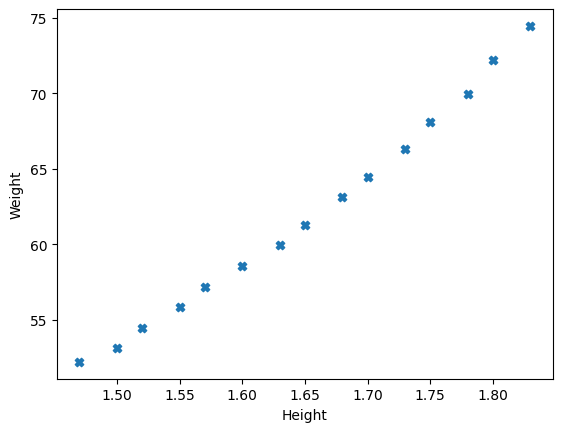

In [7]:
import matplotlib.pyplot as plt

plt.scatter(df['Height'], df['Weight'], marker='X')
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()

In [8]:
X_train = np.array(df['Height'])
y_train = np.array(df['Weight'])
X_train = np.expand_dims(X_train, -1)

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
y_pred = model.predict(X_train)
print("Train MSE: {:.4f}".format(mean_squared_error(y_pred, y_train)))

Train MSE: 0.4994


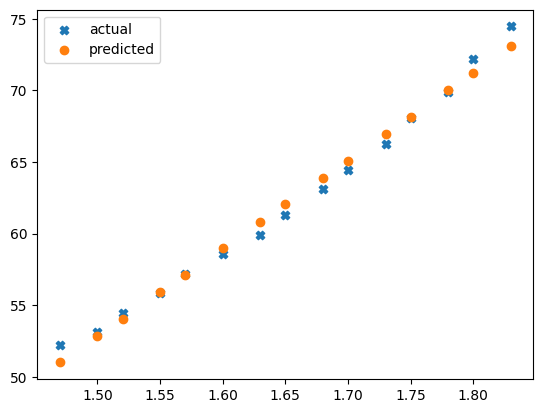

In [14]:
import matplotlib.pyplot as plt

plt.scatter(X_train, y_train, marker='X', label='actual')
plt.scatter(X_train, y_pred, marker='o', label='predicted')
plt.legend()
plt.show()

In [16]:
df = pd.read_csv('/content/drive/MyDrive/DATASETS/Copy of advertise.csv')

In [17]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [18]:
X = np.array(df[['TV', 'Radio', 'Newspaper']])
y = np.array(df['Sales'])

In [22]:
def split_indices(n, test_frac, seed):
    """
    Provides indices for creating training and test set.
    """
    # Determine the size of the test set
    n_test = int(test_frac * n)
    np.random.seed(seed)
    # Create random permutation between 0 to n-1
    idxs = np.random.permutation(n)
    # Pick first n_test indices for test set
    return idxs[n_test:], idxs[:n_test]

In [23]:
test_frac = 0.2 ## Set the fraction for the test set
rand_seed = 42 ## Set the random seed

train_indices, test_indices = split_indices(df.shape[0], test_frac, rand_seed)
print("#samples in training set: {}".format(len(train_indices)))
print("#samples in test set: {}".format(len(test_indices)))

#samples in training set: 160
#samples in test set: 40


In [24]:
X_train = X[train_indices]
y_train = y[train_indices]
X_test = X[test_indices]
y_test = y[test_indices]

### Build the model and train on the dataset.

In [27]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [28]:
print("Training MSE: {:.4f}".format(mean_squared_error(model.predict(X_train), y_train)))
print("Test MSE: {:.4f}".format(mean_squared_error(model.predict(X_test), y_test)))

Training MSE: 2.6761
Test MSE: 2.9078


# Logistic Regression

In [30]:
df = pd.read_csv('/content/drive/MyDrive/DATASETS/Copy of heights.csv')
df.head()

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20


In [31]:
X_train = np.array(df['Height'])
y_train = np.array((df['Weight'] >= 60).astype('float'))
X_train = np.expand_dims(X_train, -1)

In [32]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [38]:
y_pred_probs = model.predict(X_train)
y_pred = (y_pred_probs >= 0.5).astype('float')
print("Train Accuracy: {}".format(accuracy_score(y_pred, y_train)))

Train Accuracy: 0.5333333333333333


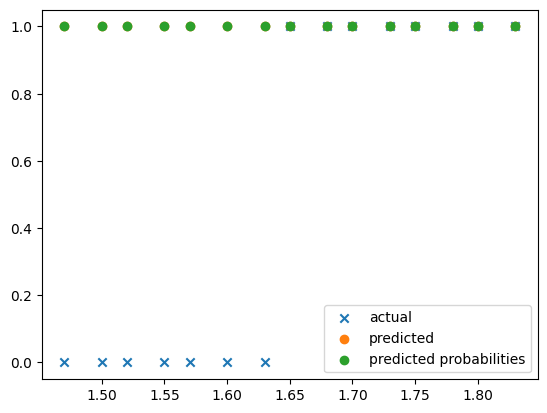

In [39]:
import matplotlib.pyplot as plt

plt.scatter(X_train, y_train, marker='x', label='actual')
plt.scatter(X_train, y_pred, marker='o', label='predicted')
plt.scatter(X_train, y_pred_probs, marker='o', label='predicted probabilities')
plt.legend()
plt.show()

# K Means Clustering



In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters of the two Gaussians
mu1 = np.array([3, 3])
Sigma1 = np.array([[1, 0], [0, 2]])

mu2 = np.array([1, -3])
Sigma2 = np.array([[2, 0], [0, 1]])

mu3 = np.array([-10, 8])
Sigma3 = np.array([[2, 0], [0, 2]])



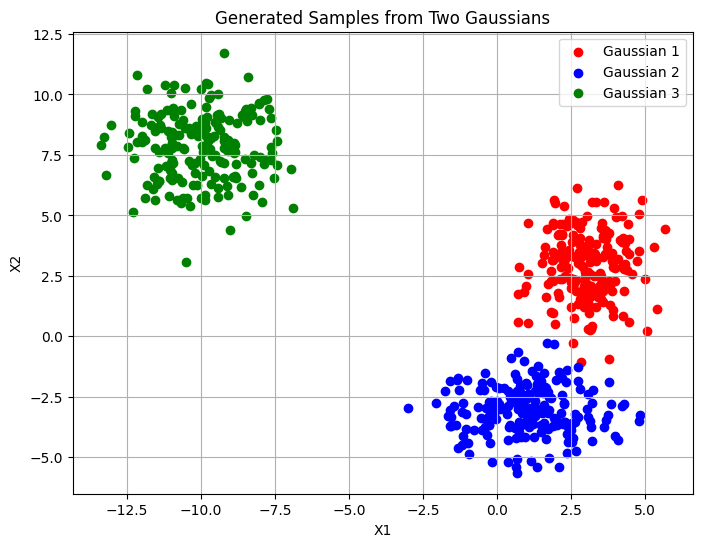

In [48]:
n_samples = 200
samples1 = np.random.multivariate_normal(mu1, Sigma1, n_samples)
samples2 = np.random.multivariate_normal(mu2, Sigma2, n_samples)
samples3 = np.random.multivariate_normal(mu3, Sigma3, n_samples)

# Plot the generated samples
plt.figure(figsize=(8, 6))
plt.scatter(samples1[:, 0], samples1[:, 1], c='red', label='Gaussian 1')
plt.scatter(samples2[:, 0], samples2[:, 1], c='blue', label='Gaussian 2')
plt.scatter(samples3[:, 0], samples3[:, 1], c='green', label='Gaussian 3')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Generated Samples from Two Gaussians')
plt.legend()
plt.grid(True)
plt.show()

The above is the dataset generated from 3 gaussians, and a visualizations for the same, You need to assume that you have the data and then you use k means for the same your output should be similar to what is shown above

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


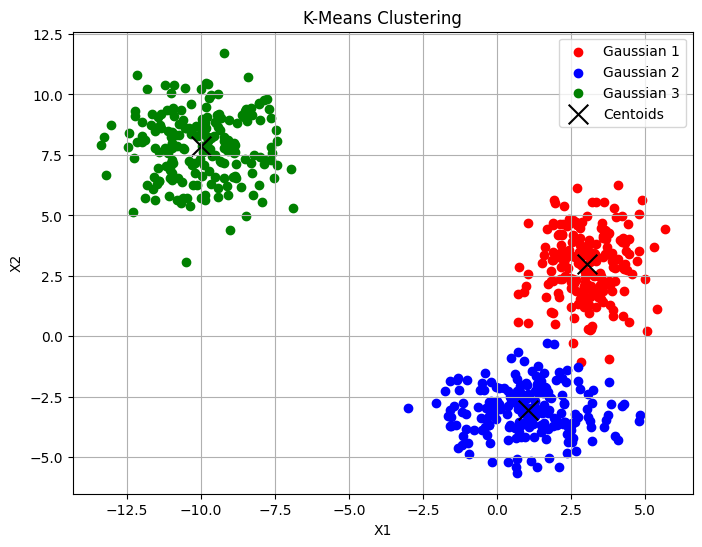

In [61]:
X = np.vstack((samples1, samples2, samples3))
model = KMeans(3)
model.fit(X)
labels = model.predict(X)
centroids = model.cluster_centers_


plt.figure(figsize=(8, 6))

plt.scatter(samples1[:, 0], samples1[:, 1], c='red', label='Gaussian 1')
plt.scatter(samples2[:, 0], samples2[:, 1], c='blue', label='Gaussian 2')
plt.scatter(samples3[:, 0], samples3[:, 1], c='green', label='Gaussian 3')
plt.scatter(centroids[:,0], centroids[:, 1], c = 'black', marker='x', s=200, label='Centoids')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('K-Means Clustering')
plt.legend()
plt.grid(True)
plt.show()